In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score, precision_score, log_loss, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
!pip install xgboost
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
!pip install lightgbm
from lightgbm import LGBMClassifier


In [2]:

df = pd.read_csv(r"C:\Users\joelf\Downloads\6accident_data.csv")

In [3]:
df.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200754AM08507,A,345,NaN,0.0,Fatal,NaN,28-01-2021,Tuesday,1,...,Skidded,No tow/articulation,Offside,0,Overtaking moving vehicle - offside,1,Car,No,Back,2021
1,2009559D02192,A,30,NaN,0.0,Fatal,NaN,29-11-2021,Thursday,1,...,NaN,No tow/articulation,Offside,0,Going ahead left-hand bend,1,Motorcycle over 500cc,No,Front,2020
2,201054MB04210,Motorway,4,NaN,0.0,Fatal,NaN,15-03-2021,Saturday,1,...,NaN,No tow/articulation,Did not leave carriageway,0,Going ahead other,2,Motorcycle over 125cc and up to 500cc,No,Back,2019
3,201014A194610,Motorway,18,A,630.0,Fatal,NaN,08-07-2020,Tuesday,1,...,NaN,No tow/articulation,Did not leave carriageway,0,Reversing,3,Other vehicle,No,Back,2019
4,201014A194610,Motorway,18,A,630.0,Fatal,NaN,30-11-2010,Tuesday,1,...,NaN,No tow/articulation,Did not leave carriageway,0,Reversing,3,Other vehicle,No,Back,2010


In [4]:
print(df.isnull().sum())

Accident_Index                                     0
1st_Road_Class                                     0
1st_Road_Number                                    0
2nd_Road_Class                                 11419
2nd_Road_Number                                  290
Accident_Severity                                  0
Carriageway_Hazards                            25443
Date                                               0
Day_of_Week                                        0
Did_Police_Officer_Attend_Scene_of_Accident        0
Junction_Control                                   0
Junction_Detail                                    0
Latitude                                           0
Light_Conditions                                   0
Location_Easting_OSGR                              0
Location_Northing_OSGR                             0
Longitude                                          0
LSOA_of_Accident_Location                        493
Number_of_Casualties                          

## Lot of Missing Values 

In [5]:
#checking the columns and shape
print("\n",df.columns)
print("\n",df.shape)


 Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Road_Surface_Conditions',
       'Road_Type', 'Special_Conditions_at_Site', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'InScotland',
       'Age_Band_of_Driver', 'Age_of_Vehicle', 'Driver_Home_Area_Type',
       'Driver_IMD_Decile', 'Engine_Capacity_.CC.',
       'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway',
       'Journey_Purpose_of_Driver', 'Junction_Location', 'make', 'model',
       'Propulsi

## Statistical Analysis of the project

In [6]:
df.describe(include ='all')

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
count,26001,26001,26001.000000,14582,25711.000000,26001,558,26001,26001,26001.000000,...,6560,26001,26001,26001.000000,26001,26001.000000,26001,26001,26001,26001.000000
unique,18837,6,NaN,6,NaN,3,5,1460,7,NaN,...,5,6,9,NaN,18,NaN,13,3,6,NaN
top,201006XP26465,A,NaN,Unclassified,NaN,Slight,Any animal in carriageway (except ridden horse),12-11-2010,Friday,NaN,...,Skidded,No tow/articulation,Did not leave carriageway,NaN,Going ahead other,NaN,Car,No,Front,NaN
freq,9,12508,NaN,9895,NaN,17775,197,82,4340,NaN,...,4631,25751,20362,NaN,12552,NaN,19621,25975,14638,NaN
mean,NaN,NaN,982.875812,NaN,435.147058,NaN,NaN,NaN,NaN,1.093843,...,NaN,NaN,NaN,0.077497,NaN,1.441021,NaN,NaN,NaN,2014.482405
std,NaN,NaN,1789.917052,NaN,1446.424444,NaN,NaN,NaN,NaN,0.295545,...,NaN,NaN,NaN,0.749432,NaN,0.719022,NaN,NaN,NaN,4.929699
min,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,2010.000000
25%,NaN,NaN,4.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,2010.000000
50%,NaN,NaN,158.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,2010.000000
75%,NaN,NaN,684.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN,NaN,2020.000000


### Data Cleaning and Preprocessing

In [7]:
df = df.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR'], axis=1)

In [8]:
df.shape

(26001, 51)

In [9]:
## converting all column names to lowercase and removing extra characters for easy query

df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(".", '', regex=False)
df.columns = df.columns.str.replace("(", '', regex=False)
df.columns = df.columns.str.replace(")", '', regex=False)

In [10]:
df.head()

,accident_index,1st_road_class,1st_road_number,2nd_road_class,2nd_road_number,accident_severity,carriageway_hazards,date,day_of_week,did_police_officer_attend_scene_of_accident,...,skidding_and_overturning,towing_and_articulation,vehicle_leaving_carriageway,vehicle_locationrestricted_lane,vehicle_manoeuvre,vehicle_reference,vehicle_type,was_vehicle_left_hand_drive,x1st_point_of_impact,year
0,200754AM08507,A,345,NaN,0.0,Fatal,NaN,28-01-2021,Tuesday,1,...,Skidded,No tow/articulation,Offside,0,Overtaking moving vehicle - offside,1,Car,No,Back,2021
1,2009559D02192,A,30,NaN,0.0,Fatal,NaN,29-11-2021,Thursday,1,...,NaN,No tow/articulation,Offside,0,Going ahead left-hand bend,1,Motorcycle over 500cc,No,Front,2020
2,201054MB04210,Motorway,4,NaN,0.0,Fatal,NaN,15-03-2021,Saturday,1,...,NaN,No tow/articulation,Did not leave carriageway,0,Going ahead other,2,Motorcycle over 125cc and up to 500cc,No,Back,2019
3,201014A194610,Motorway,18,A,630.0,Fatal,NaN,08-07-2020,Tuesday,1,...,NaN,No tow/articulation,Did not leave carriageway,0,Reversing,3,Other vehicle,No,Back,2019
4,201014A194610,Motorway,18,A,630.0,Fatal,NaN,30-11-2010,Tuesday,1,...,NaN,No tow/articulation,Did not leave carriageway,0,Reversing,3,Other vehicle,No,Back,2010


In [11]:
df.dtypes

accident_index                                  object
1st_road_class                                  object
1st_road_number                                  int64
2nd_road_class                                  object
2nd_road_number                                float64
accident_severity                               object
carriageway_hazards                             object
date                                            object
day_of_week                                     object
did_police_officer_attend_scene_of_accident      int64
junction_control                                object
junction_detail                                 object
latitude                                       float64
light_conditions                                object
longitude                                      float64
lsoa_of_accident_location                       object
number_of_casualties                             int64
number_of_vehicles                               int64
pedestrian

In [12]:
# Since we have datetime column we need to convert from object to datetime datatype
df['date'] = pd.to_datetime((df['date']), format= "%d-%m-%Y")

In [13]:
df.dtypes

accident_index                                         object
1st_road_class                                         object
1st_road_number                                         int64
2nd_road_class                                         object
2nd_road_number                                       float64
accident_severity                                      object
carriageway_hazards                                    object
date                                           datetime64[ns]
day_of_week                                            object
did_police_officer_attend_scene_of_accident             int64
junction_control                                       object
junction_detail                                        object
latitude                                              float64
light_conditions                                       object
longitude                                             float64
lsoa_of_accident_location                              object
number_o

In [14]:
#Conversion of other columns to of missed datatype
df[['did_police_officer_attend_scene_of_accident',
    '1st_road_number',
    '2nd_road_number',
    'pedestrian_crossing-physical_facilities',
    'pedestrian_crossing-human_control']]= df[['did_police_officer_attend_scene_of_accident',
    '1st_road_number',
    '2nd_road_number',
    'pedestrian_crossing-physical_facilities',
   'pedestrian_crossing-human_control']].astype('object')

In [15]:
df.columns.to_series().groupby(df.dtypes).groups

{datetime64[ns]: ['date'], int64: ['number_of_casualties', 'number_of_vehicles', 'speed_limit', 'age_of_vehicle', 'vehicle_locationrestricted_lane', 'vehicle_reference', 'year'], float64: ['latitude', 'longitude', 'driver_imd_decile', 'engine_capacity_cc'], object: ['accident_index', '1st_road_class', '1st_road_number', '2nd_road_class', '2nd_road_number', 'accident_severity', 'carriageway_hazards', 'day_of_week', 'did_police_officer_attend_scene_of_accident', 'junction_control', 'junction_detail', 'light_conditions', 'lsoa_of_accident_location', 'pedestrian_crossing-human_control', 'pedestrian_crossing-physical_facilities', 'road_surface_conditions', 'road_type', 'special_conditions_at_site', 'time', 'urban_or_rural_area', 'weather_conditions', 'inscotland', 'age_band_of_driver', 'driver_home_area_type', 'hit_object_in_carriageway', 'hit_object_off_carriageway', 'journey_purpose_of_driver', 'junction_location', 'make', 'model', 'propulsion_code', 'sex_of_driver', 'skidding_and_overtur

In [16]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

carriageway_hazards                            97.853929
special_conditions_at_site                     97.180878
hit_object_in_carriageway                      92.573363
hit_object_off_carriageway                     82.673743
skidding_and_overturning                       74.770201
2nd_road_class                                 43.917542
make                                           21.295335
driver_imd_decile                              12.172609
model                                           7.949694
lsoa_of_accident_location                       1.896081
2nd_road_number                                 1.115342
engine_capacity_cc                              0.507673
accident_index                                  0.000000
driver_home_area_type                           0.000000
journey_purpose_of_driver                       0.000000
junction_location                               0.000000
sex_of_driver                                   0.000000
propulsion_code                

In [17]:
df['2nd_road_class'].value_counts()/df.shape[0]*100

2nd_road_class
Unclassified    38.056229
A                8.465059
C                5.230568
B                3.711396
Motorway         0.569209
A(M)             0.049998
Name: count, dtype: float64

## Filling the missing values

In [18]:
df['driver_imd_decile'] = df['driver_imd_decile'].ffill()


In [19]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

carriageway_hazards                            97.853929
special_conditions_at_site                     97.180878
hit_object_in_carriageway                      92.573363
hit_object_off_carriageway                     82.673743
skidding_and_overturning                       74.770201
2nd_road_class                                 43.917542
make                                           21.295335
model                                           7.949694
lsoa_of_accident_location                       1.896081
2nd_road_number                                 1.115342
engine_capacity_cc                              0.507673
accident_index                                  0.000000
driver_home_area_type                           0.000000
driver_imd_decile                               0.000000
journey_purpose_of_driver                       0.000000
junction_location                               0.000000
sex_of_driver                                   0.000000
propulsion_code                

In [20]:
df['age_of_vehicle'].describe()

count    26001.000000
mean         7.701204
std          4.465731
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         58.000000
Name: age_of_vehicle, dtype: float64

In [21]:
df['age_of_vehicle'].median()

7.0

In [22]:
df['age_of_vehicle'] = df['age_of_vehicle'].fillna(7)


def fixed_vehicle_age(age):
    return age if 0 <= age <= 120 else np.nan


df['age_of_vehicle'] = df['age_of_vehicle'].apply(fixed_vehicle_age)

age_bins = [0, 2, 5, 8, 11, 14, 17, 120]
age_labels = ['1', '2', '3', '4', '5', '6', '7']
df['age_of_vehicle'] = pd.cut(df['age_of_vehicle'], bins=age_bins, labels=age_labels)

In [23]:
df = df.drop(['2nd_road_class'], axis=1)

In [24]:
df['model'].value_counts()/df.shape[0]*100

model
KA                    1.449944
CLIO DYNAMIQUE 16V    1.134572
KA 2                  0.680743
PUNTO 1.2             0.646129
SAXO VTR              0.634591
                        ...   
121 GSI 16V           0.003846
C5 HDI LX AUTO        0.003846
330I SE AUTO          0.003846
106 EXTRA TIME        0.003846
A4 SE TDI 6SP         0.003846
Name: count, Length: 5119, dtype: float64

In [25]:
df['model'].describe()

count     23934
unique     5119
top          KA
freq        377
Name: model, dtype: object

In [26]:
df['model'] = df['model'].ffill()

In [27]:
df.isnull().sum()

accident_index                                     0
1st_road_class                                     0
1st_road_number                                    0
2nd_road_number                                  290
accident_severity                                  0
carriageway_hazards                            25443
date                                               0
day_of_week                                        0
did_police_officer_attend_scene_of_accident        0
junction_control                                   0
junction_detail                                    0
latitude                                           0
light_conditions                                   0
longitude                                          0
lsoa_of_accident_location                        493
number_of_casualties                               0
number_of_vehicles                                 0
pedestrian_crossing-human_control                  0
pedestrian_crossing-physical_facilities       

In [28]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

carriageway_hazards                            97.853929
special_conditions_at_site                     97.180878
hit_object_in_carriageway                      92.573363
hit_object_off_carriageway                     82.673743
skidding_and_overturning                       74.770201
make                                           21.295335
lsoa_of_accident_location                       1.896081
2nd_road_number                                 1.115342
engine_capacity_cc                              0.507673
accident_index                                  0.000000
model                                           0.000000
driver_home_area_type                           0.000000
driver_imd_decile                               0.000000
journey_purpose_of_driver                       0.000000
junction_location                               0.000000
sex_of_driver                                   0.000000
propulsion_code                                 0.000000
age_band_of_driver             

In [29]:
df['engine_capacity_cc'] = df['engine_capacity_cc'].ffill()

In [30]:
df.isnull().sum()

accident_index                                     0
1st_road_class                                     0
1st_road_number                                    0
2nd_road_number                                  290
accident_severity                                  0
carriageway_hazards                            25443
date                                               0
day_of_week                                        0
did_police_officer_attend_scene_of_accident        0
junction_control                                   0
junction_detail                                    0
latitude                                           0
light_conditions                                   0
longitude                                          0
lsoa_of_accident_location                        493
number_of_casualties                               0
number_of_vehicles                                 0
pedestrian_crossing-human_control                  0
pedestrian_crossing-physical_facilities       

In [31]:

df = df.drop(['lsoa_of_accident_location', '2nd_road_number','make'], axis=1)

In [32]:
df.isnull().sum()

accident_index                                     0
1st_road_class                                     0
1st_road_number                                    0
accident_severity                                  0
carriageway_hazards                            25443
date                                               0
day_of_week                                        0
did_police_officer_attend_scene_of_accident        0
junction_control                                   0
junction_detail                                    0
latitude                                           0
light_conditions                                   0
longitude                                          0
number_of_casualties                               0
number_of_vehicles                                 0
pedestrian_crossing-human_control                  0
pedestrian_crossing-physical_facilities            0
road_surface_conditions                            0
road_type                                     

In [33]:
df = df.drop(['skidding_and_overturning', 'hit_object_off_carriageway','hit_object_in_carriageway','special_conditions_at_site','carriageway_hazards'], axis=1)

df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

accident_index                                 0.0
propulsion_code                                0.0
age_band_of_driver                             0.0
age_of_vehicle                                 0.0
driver_home_area_type                          0.0
driver_imd_decile                              0.0
engine_capacity_cc                             0.0
journey_purpose_of_driver                      0.0
junction_location                              0.0
model                                          0.0
sex_of_driver                                  0.0
1st_road_class                                 0.0
towing_and_articulation                        0.0
vehicle_leaving_carriageway                    0.0
vehicle_locationrestricted_lane                0.0
vehicle_manoeuvre                              0.0
vehicle_reference                              0.0
vehicle_type                                   0.0
was_vehicle_left_hand_drive                    0.0
x1st_point_of_impact           

In [34]:
df.shape

(26001, 42)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26001 entries, 0 to 26000
Data columns (total 42 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   accident_index                               26001 non-null  object        
 1   1st_road_class                               26001 non-null  object        
 2   1st_road_number                              26001 non-null  object        
 3   accident_severity                            26001 non-null  object        
 4   date                                         26001 non-null  datetime64[ns]
 5   day_of_week                                  26001 non-null  object        
 6   did_police_officer_attend_scene_of_accident  26001 non-null  object        
 7   junction_control                             26001 non-null  object        
 8   junction_detail                              26001 non-null  object        


## EDA

In [36]:
df_num = df[['number_of_casualties','number_of_vehicles','speed_limit']]

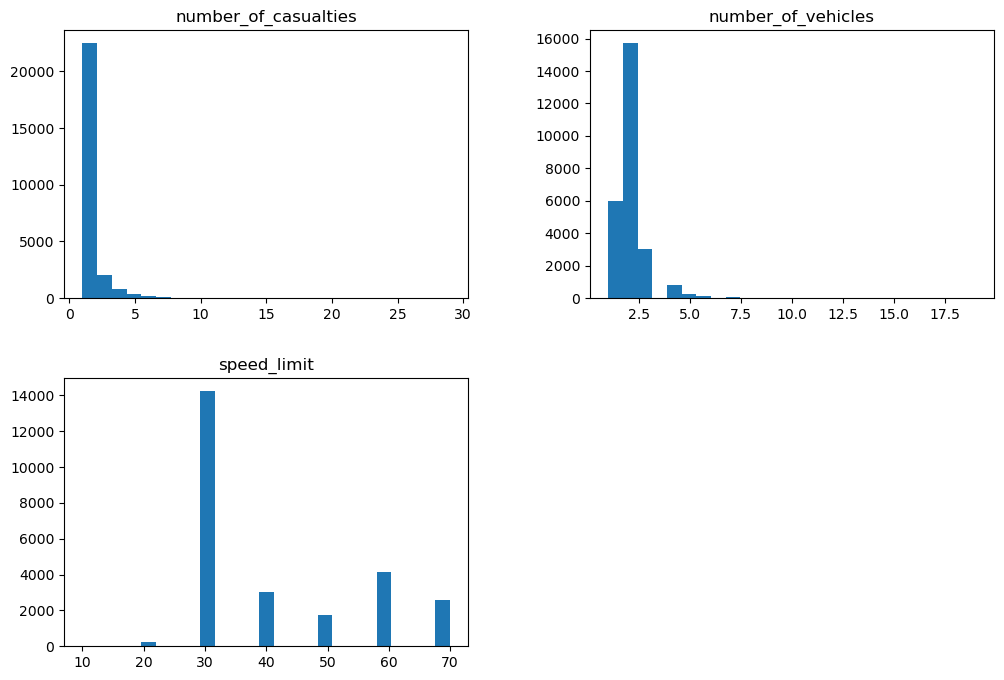

In [37]:
df_num.hist( bins=25, grid=False, figsize=(12,8))
plt.style.use('dark_background')
plt.show()

In [38]:
def casualities(num_cas):
    if num_cas >=1 and num_cas <2:
        return "1"
    elif num_cas >=2 and num_cas <3:
        return "2"
    elif num_cas >=3 and num_cas <4:
        return "3"
    elif num_cas >= 4 and num_cas <5:
        return "4"
    elif num_cas >= 5:
        return "5+"
    
df['number_of_casualties']= df['number_of_casualties'].apply(casualities)

In [39]:
df['number_of_casualties'].value_counts()

number_of_casualties
1     16976
2      5514
3      1996
4       844
5+      671
Name: count, dtype: int64

In [40]:
df['propulsion_code'].value_counts()/df.shape[0]*100

propulsion_code
Petrol              79.385408
Heavy oil           20.456906
Gas/Bi-fuel          0.084612
Hybrid electric      0.046152
Petrol/Gas (LPG)     0.023076
Gas                  0.003846
Name: count, dtype: float64

In [41]:

df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas", value="Petrol")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas/Bi-fuel", value="Bio-fuel")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Petrol/Gas (LPG)", value="LPG Petrol")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas Diesel", value="Diesel")

In [42]:
df['propulsion_code'].value_counts()/df.shape[0]*100

propulsion_code
Petrol             79.389254
Heavy oil          20.456906
Bio-fuel            0.084612
Hybrid electric     0.046152
LPG Petrol          0.023076
Name: count, dtype: float64

In [43]:
df.nunique().sort_values(ascending=False)

longitude                                      23546
latitude                                       23533
accident_index                                 18837
model                                           5119
1st_road_number                                 2060
date                                            1460
time                                            1395
engine_capacity_cc                               654
vehicle_manoeuvre                                 18
vehicle_reference                                 16
number_of_vehicles                                16
vehicle_type                                      13
driver_imd_decile                                 10
vehicle_locationrestricted_lane                   10
junction_location                                 10
vehicle_leaving_carriageway                        9
age_band_of_driver                                 9
weather_conditions                                 9
junction_detail                               

In [44]:
df['date'] = pd.to_datetime(df['date'])

In [45]:
df['month'] = df ['date'].apply(lambda time: time.month)

In [46]:
#creating a weekend feature that includes Friday-Sunday
df['weekend']= np.where(df['day_of_week'].isin(['Friday', 'Saturday', 'Sunday']), 1, 0)

In [47]:
timeofdaygroups = {1: "Morning Rush (6-10)",
                   2: "Day (10-12)",
                   3: "Lunch Rush (12-14)",
                   4: "Afternoon (14-16)",
                   5: "After Work Rush (16-18)",
                   6: "Evening (18-22)",
                   7: "Night (22-6)"}

In [48]:
df['hour'] = df['time'].str[0:2]  
df['hour'] =  pd.to_numeric(df['hour'])
df['hour'] = df['hour'].astype('int')

In [49]:
def daygroup(hour):
    if hour >= 6 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 12:
        return "2"
    elif hour >= 12 and hour < 14:
        return "3"
    elif hour >= 14 and hour < 16:
        return "4"
    elif hour >= 16 and hour < 18:
        return "5"
    elif hour >= 18 and hour < 22:
        return "6"
    else:
        return "7"
    
df['time_of_day']= df['hour'].apply(daygroup)   

In [50]:
df[['weekend','day_of_week','time', 'time_of_day']].tail(10)

,weekend,day_of_week,time,time_of_day
25991,1,Saturday,13:00:00,3
25992,1,Friday,18:15:00,6
25993,0,Monday,14:59:00,4
25994,0,Monday,15:00:00,4
25995,0,Monday,16:45:00,5
25996,1,Friday,18:50:00,6
25997,1,Friday,13:30:00,3
25998,0,Tuesday,17:50:00,5
25999,0,Monday,08:25:00,1
26000,0,Thursday,16:15:00,5


In [51]:
df.shape

(26001, 46)

In [52]:
df['vehicle_type'].value_counts()/df.shape[0]*100

vehicle_type
Car                                      75.462482
Motorcycle 125cc and under                6.307450
Motorcycle over 500cc                     4.603669
Motorcycle 50cc and under                 4.584439
Van / Goods 3.5 tonnes mgw or under       3.419099
Motorcycle over 125cc and up to 500cc     1.884543
Goods 7.5 tonnes mgw and over             1.280720
Bus or coach (17 or more pass seats)      1.057652
Taxi/Private hire car                     0.657667
Goods over 3.5t. and under 7.5t           0.280758
Agricultural vehicle                      0.242298
Other vehicle                             0.149994
Minibus (8 - 16 passenger seats)          0.069228
Name: count, dtype: float64

In [53]:
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle over 500cc", value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace= "Motorcycle over 125cc and up to 500cc",value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle 125cc and under", value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle 50cc and under", value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle - unknown cc", value="Motorcycle")

df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Van / Goods 3.5 tonnes mgw or under", value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods over 3.5t. and under 7.5t", value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods 7.5 tonnes mgw and over", value="Goods Vehicle")

df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Taxi/Private hire car", value="Car")

df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Minibus (8 - 16 passenger seats)", value="Bus")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Bus or coach (17 or more pass seats)",value="Bus")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Agricultural vehicle", value="Other Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Other vehicle", value="Other Vehicle")

In [54]:
df['vehicle_type'].value_counts()/df.shape[0]*100

vehicle_type
Car              76.120149
Motorcycle       17.380101
Goods Vehicle     4.980578
Bus               1.126880
Other Vehicle     0.392293
Name: count, dtype: float64

In [55]:
df['age_band_of_driver'].value_counts()/df.shape[0]*100

age_band_of_driver
16 - 20                         52.313373
21 - 25                         32.733356
26 - 35                          6.499750
46 - 55                          6.026691
36 - 45                          1.888389
56 - 65                          0.280758
Over 75                          0.115380
66 - 75                          0.107688
Data missing or out of range     0.034614
Name: count, dtype: float64

In [56]:
df.drop(df[df['age_band_of_driver'] == 'Data missing or out of range'].index, inplace=True)

In [57]:
df['age_band_of_driver']=df['age_band_of_driver'].replace("Over 75","75-100")

In [59]:
df['age_band_of_driver']

0        16 - 20
1        36 - 45
2        26 - 35
3        46 - 55
4        46 - 55
          ...   
25996    21 - 25
25997    21 - 25
25998    21 - 25
25999    21 - 25
26000    21 - 25
Name: age_band_of_driver, Length: 26001, dtype: object

In [58]:
df['age_band_of_driver']=df['age_band_of_driver'].replace("Data missing or out of range","11 - 15")

In [59]:
df.drop(df[df['age_band_of_driver'] == 'Nov-15'].index, inplace=True)

In [60]:

df.drop(df[df['age_band_of_driver'] == '06-Oct'].index, inplace=True)

In [61]:
df['age_band_of_driver'].value_counts()/df.shape[0]*100

age_band_of_driver
16 - 20    52.331487
21 - 25    32.744691
26 - 35     6.502001
46 - 55     6.028778
36 - 45     1.889043
56 - 65     0.280856
75-100      0.115420
66 - 75     0.107725
Name: count, dtype: float64

In [62]:
age1 = ["0 - 5", "6 - 10", "11 - 15"]
age2 = ["16 - 20","21 - 25"]
age3 = ["26 - 35","36 - 45"]
age4 = ["46 - 55", "56 - 65"]
age5 = ["66 - 75", "75-100"]

In [63]:
for (row, col) in df.iterrows():

    if str.lower(col.age_band_of_driver) in age1:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, value='Under 16', inplace=True)

    if str.lower(col.age_band_of_driver) in age2:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, value='16-25', inplace=True)
    
    if str.lower(col.age_band_of_driver) in age3:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, value='26-45', inplace=True)
    if str.lower(col.age_band_of_driver) in age4:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, value='46-65', inplace=True)
    if str.lower(col.age_band_of_driver) in age5:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, value='Over 65', inplace=True)


C:\Users\joelf\AppData\Local\Temp\ipykernel_1604\375278678.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, value='16-25', inplace=True)
C:\Users\joelf\AppData\Local\Temp\ipykernel_1604\375278678.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

In [64]:
print("Distinct responses for age_band_of_driver:\n", set(df['age_band_of_driver']))

Distinct responses for age_band_of_driver:
 {'Over 65', '26-45', '16-25', '46-65'}


In [65]:
df.shape

(25992, 46)

In [66]:
df['number_of_vehicles'].value_counts()/df.shape[0]*100

number_of_vehicles
2     60.472453
1     22.964758
3     11.668975
4      3.120191
5      0.881040
6      0.407818
7      0.188520
8      0.115420
9      0.050015
19     0.034626
13     0.026931
10     0.019237
12     0.019237
16     0.015389
14     0.011542
11     0.003847
Name: count, dtype: float64

In [67]:
def vehicles(num_veh):
    if num_veh >=1 and num_veh <2:
        return "1"
    elif num_veh >=2 and num_veh <3:
        return "2"
    elif num_veh >=3 and num_veh <4:
        return "3"
    elif num_veh >= 4: 
        return "4+"
  

df['number_of_vehicles']= df['number_of_vehicles'].apply(vehicles)

In [68]:

df['number_of_vehicles'].value_counts()/df.shape[0]*100

number_of_vehicles
2     60.472453
1     22.964758
3     11.668975
4+     4.893813
Name: count, dtype: float64

In [69]:
df['number_of_vehicles'].dtypes

dtype('O')

In [70]:
def getSeason(month):
    if (month == 2 or month == 12 or month == 1):
       return "Winter"
    elif(month == 6 or month == 7 or month ==8 or month == 9):
       return "Rainy"
    elif(month == 3 or month== 4 or month == 5):
       return "Summer"
    else:
       return "Autumn"

df['season'] = df['month'].apply(getSeason)

In [71]:

def enginecap(eng_cc):
    if eng_cc <=1500:
        return "small engine cc"
    if eng_cc >1500 and eng_cc <=2000:
        return "medium engine cc"
    if eng_cc >2000:
        return "large engine cc"


df['engine_capacity_cc_size'] = df['engine_capacity_cc'].apply(enginecap)

In [72]:
df['accident_severity'].value_counts()/df.shape[0]*100

accident_severity
Slight     68.386427
Serious    23.957371
Fatal       7.656202
Name: count, dtype: float64

In [73]:
df['accident_seriousness'] = df['accident_severity']
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Slight",value="Not Serious")
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Serious",value="Serious")
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Fatal",value="Fatal")
df.shape

(25992, 49)

In [74]:
df['accident_seriousness'].value_counts()/df.shape[0]*100

accident_seriousness
Not Serious    68.386427
Serious        23.957371
Fatal           7.656202
Name: count, dtype: float64

C:\Users\joelf\AppData\Local\Temp\ipykernel_1604\124094351.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  mt = sns.barplot(


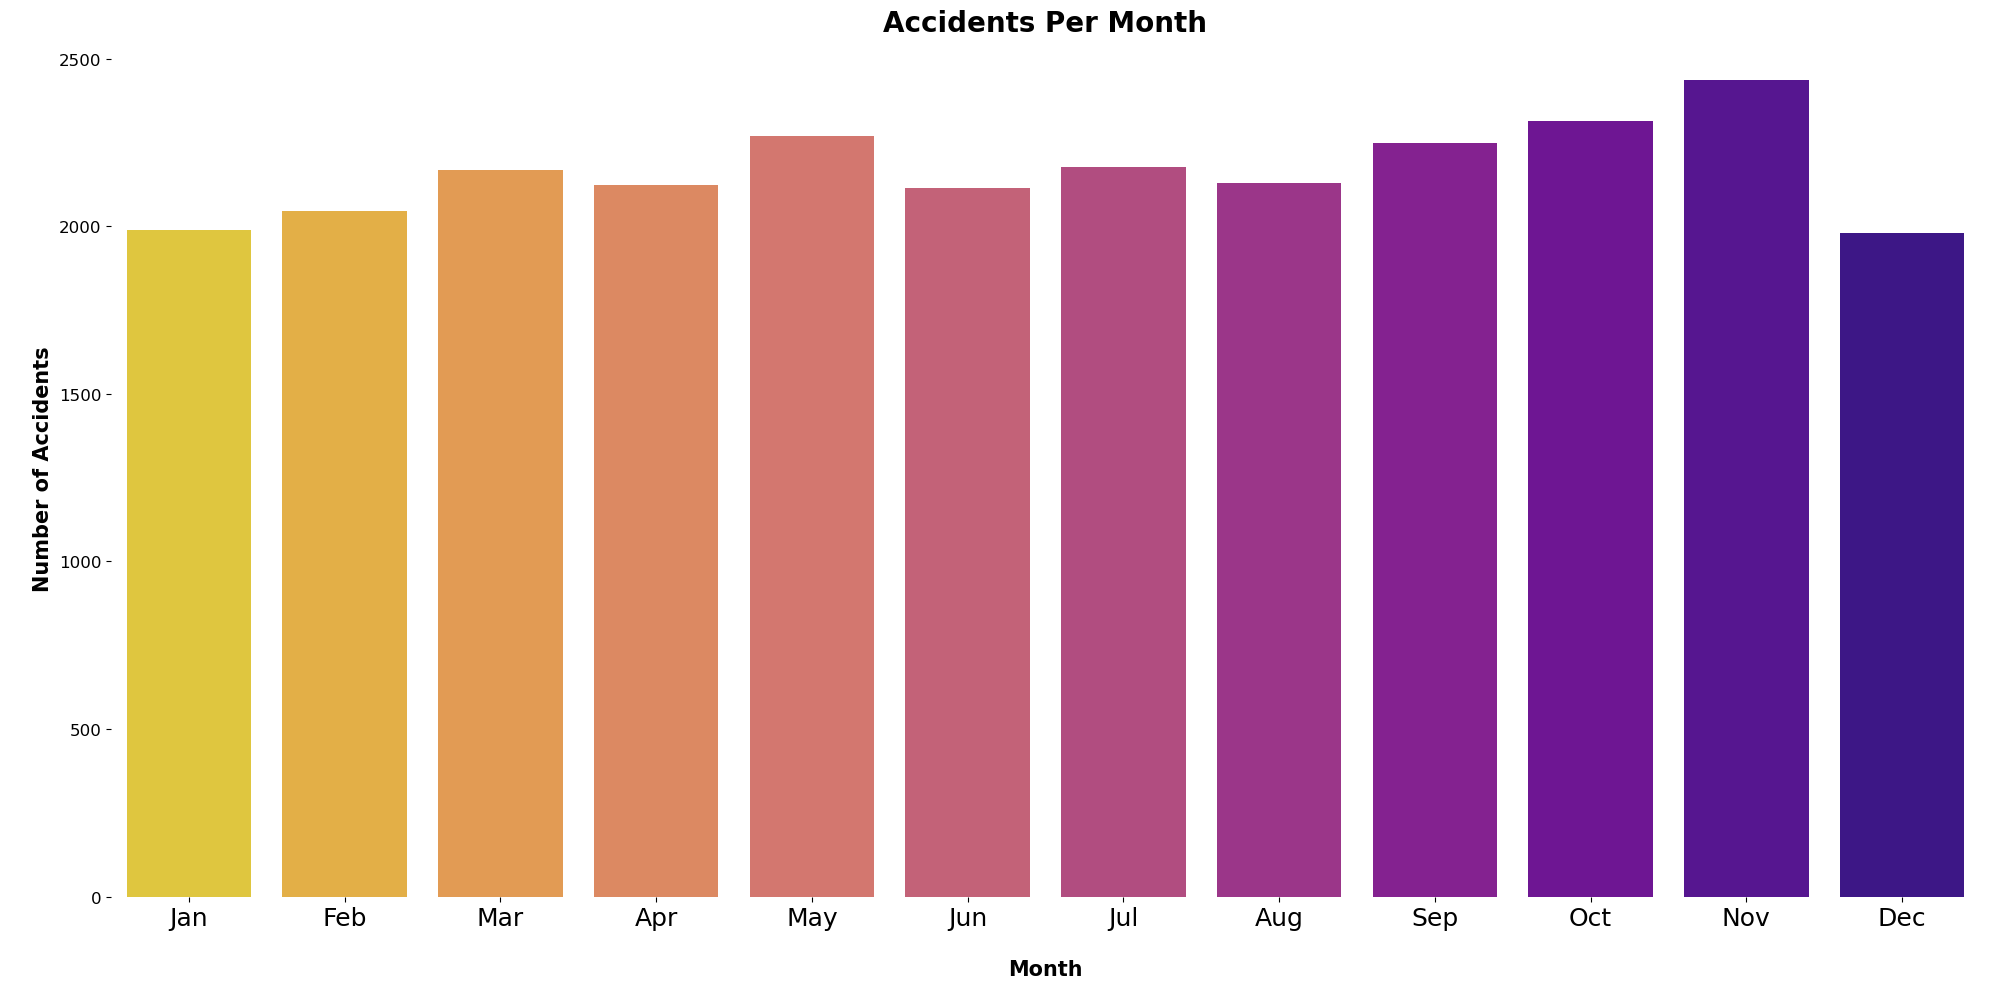

In [75]:

accidentspermonth = df.groupby(['month'])['accident_index'].count()

# Prepare plot
plt.style.use('default')
plt.figure(figsize=(20, 10))
colors = sns.color_palette("plasma_r", n_colors=12)

# Create barplot with explicit `hue` set to `None`
mt = sns.barplot(
    x=accidentspermonth.index, 
    y=accidentspermonth.values, 
    palette=colors,
    hue=None
)

sns.despine(top=True, right=True, left=True, bottom=True)

# Define group labels
group_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Set the correct tick positions and labels
mt.set_xticks(range(len(group_labels)))
mt.set_xticklabels(group_labels, fontsize=18)

# Add labels and title
plt.title("Accidents Per Month", fontsize=20, fontweight="bold")
plt.xlabel("\nMonth", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.yticks(fontsize=12)

# Save and adjust layout
plt.savefig('acc_month.png')
plt.tight_layout()
plt.show()

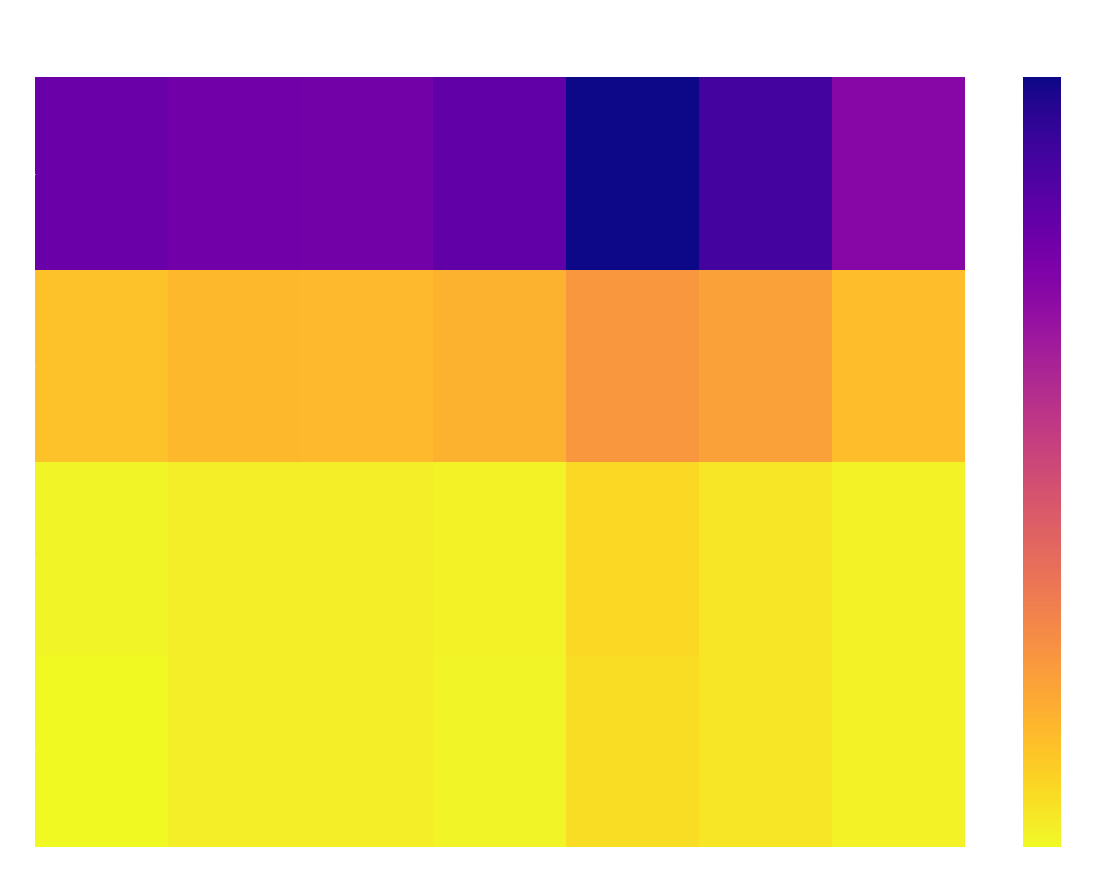

In [76]:

weekdays = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
accweekday = df.groupby(['year', 'day_of_week']).size()
accweekday = accweekday.rename_axis(['year', 'day_of_week'])\
                                    .unstack('day_of_week')\
                                    .reindex(columns=weekdays)
plt.figure(figsize=(15,10))
plt.style.use('dark_background')
sns.heatmap(accweekday, cmap='plasma_r')

plt.title('\nAccidents by Weekday per Year\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.savefig('acc_week_vs_year.png')
plt.show()

C:\Users\joelf\AppData\Local\Temp\ipykernel_1604\1308311713.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidentsperseason.index, y=accidentsperseason.values, order=seaord, saturation=1, palette='magma_r')


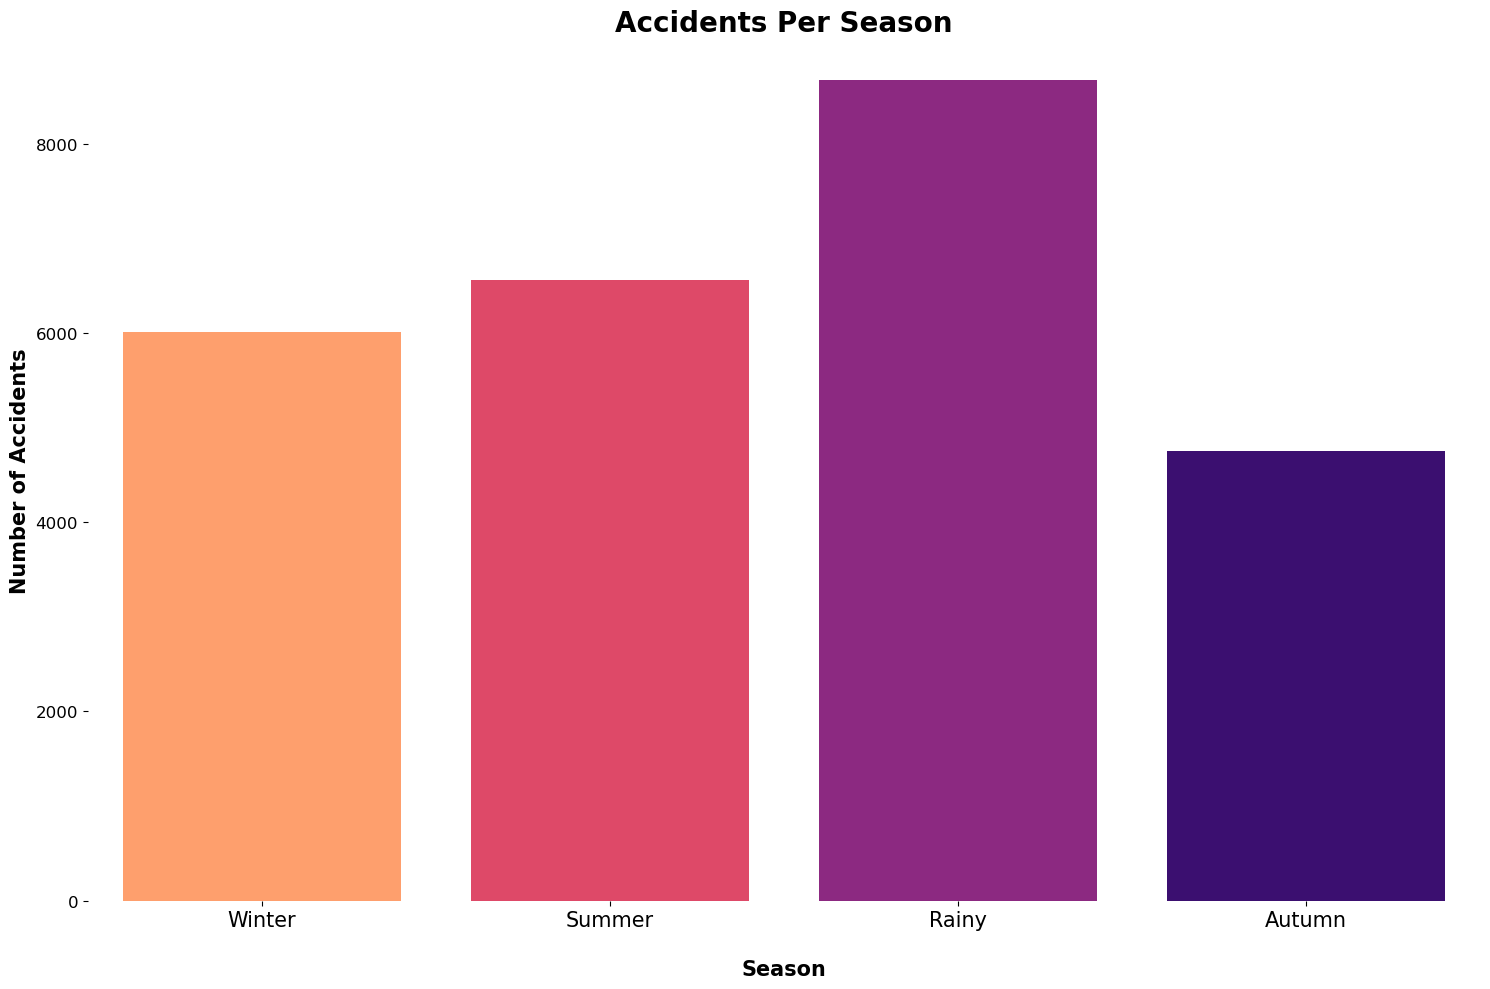

In [77]:
accidentsperseason = df.groupby(['season'])['accident_index'].count()
seaord=['Winter', 'Summer', 'Rainy','Autumn']
# prepare plot
plt.style.use('default')
plt.figure(figsize=(15,10))

sns.barplot(x=accidentsperseason.index, y=accidentsperseason.values, order=seaord, saturation=1, palette='magma_r')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Season",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("\nSeason", fontsize=15, fontweight="bold")
plt.ylabel("Number of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('acc_season.png')
plt.show()

In [78]:
timeofdaygroups = {'1': "Morning Rush",
                   '2': "Day",
                   '3': "Lunch Rush",
                   '4': "Afternoon",
                   '5': "After Work Rush",
                   '6': "Evening",
                   '7': "Night"}
df['time_of_day']=df['time_of_day'].map(timeofdaygroups)

In [79]:
df['time_of_day']

0                Evening
1                Evening
2                  Night
3                  Night
4                  Night
              ...       
25996            Evening
25997         Lunch Rush
25998    After Work Rush
25999       Morning Rush
26000    After Work Rush
Name: time_of_day, Length: 25992, dtype: object

C:\Users\joelf\AppData\Local\Temp\ipykernel_1604\3007996904.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidentspertod.index, y=accidentspertod.values, order=tod, palette='rainbow')


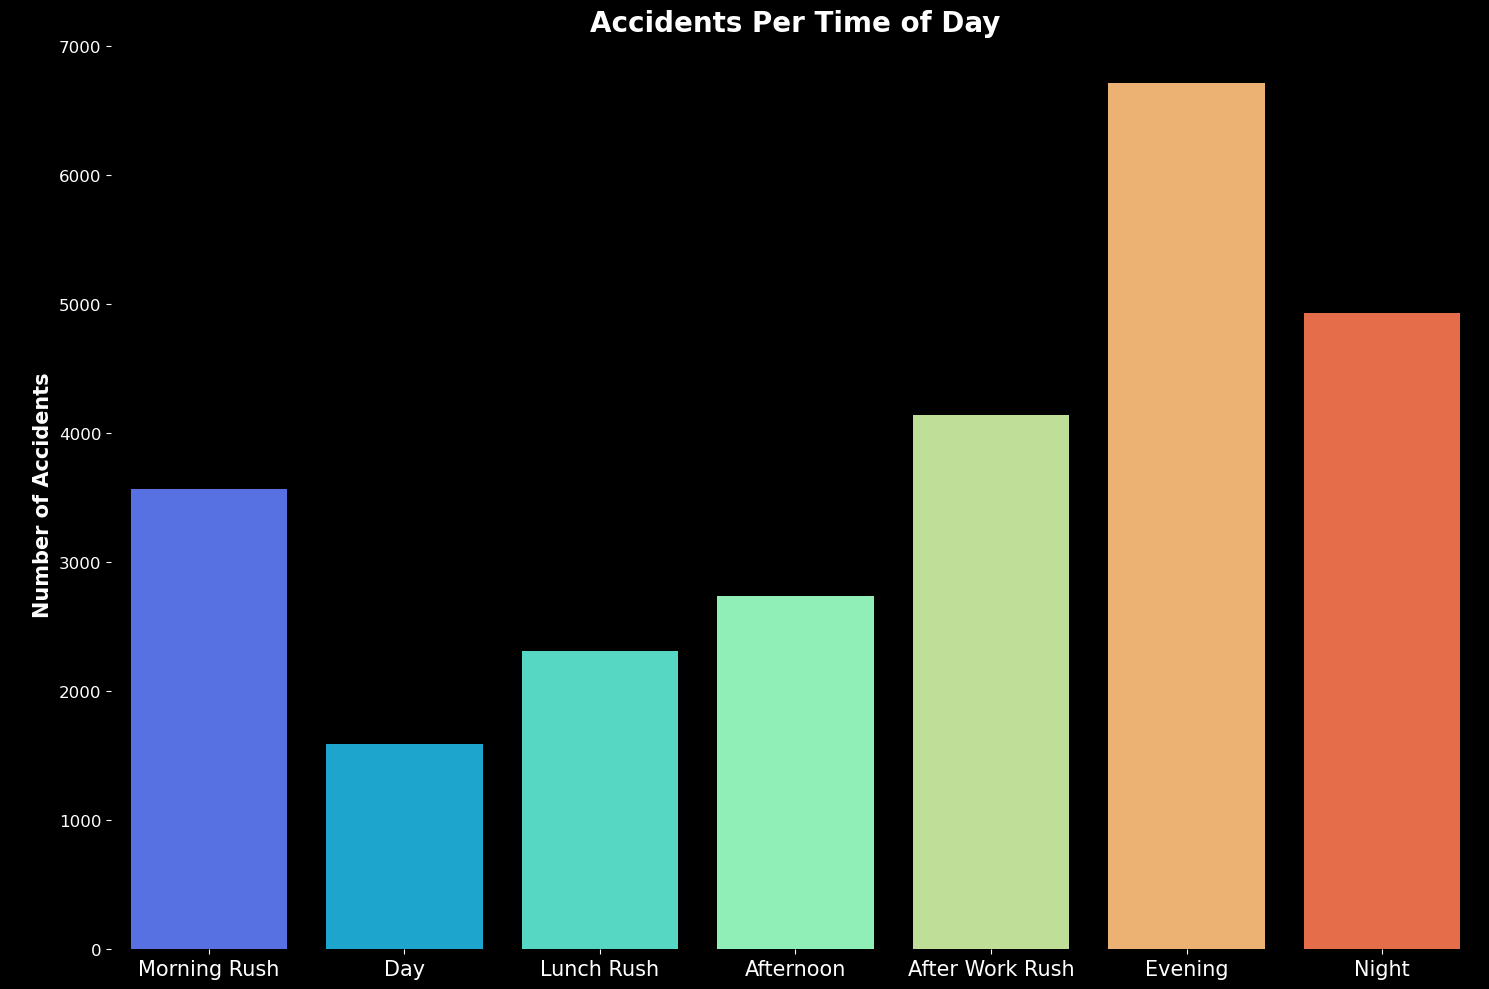

In [80]:
accidentspertod = df.groupby(['time_of_day'])['accident_index'].count()

# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(15,10))
tod=["Morning Rush", "Day", "Lunch Rush", "Afternoon",
     "After Work Rush", "Evening", "Night"]
sns.barplot(x=accidentspertod.index, y=accidentspertod.values, order=tod, palette='rainbow')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Time of Day", fontsize=20, fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('acc_russ.png')
plt.show()

In [81]:
df['weather_conditions'].value_counts()/df.shape[0]*100

weather_conditions
Fine no high winds       80.863343
Raining no high winds    11.126500
Other                     3.031702
Fine + high winds         1.231148
Snowing no high winds     1.081102
Raining + high winds      0.931056
Unknown                   0.877193
Fog or mist               0.730994
Snowing + high winds      0.126962
Name: count, dtype: float64

In [82]:
df.drop(df[df['weather_conditions'] == 'Data missing or out of range'].index, inplace=True)

In [83]:
df['weather_conditions'] = df['weather_conditions'].replace(to_replace="Unknown",value="Fog or mist")
df['weather_conditions'] = df['weather_conditions'].replace(to_replace="Other",value="Mud")

In [84]:
df['weather_conditions'].value_counts()/df.shape[0]*100

weather_conditions
Fine no high winds       80.863343
Raining no high winds    11.126500
Mud                       3.031702
Fog or mist               1.608187
Fine + high winds         1.231148
Snowing no high winds     1.081102
Raining + high winds      0.931056
Snowing + high winds      0.126962
Name: count, dtype: float64

In [85]:
df['sex_of_driver'].value_counts()/df.shape[0]*100

sex_of_driver
Male         74.449831
Female       25.546322
Not known     0.003847
Name: count, dtype: float64

In [86]:
df['light_conditions'].value_counts()/df.shape[0]*100

light_conditions
Daylight                   57.771622
Darkness - lights lit      31.163435
Darkness - no lighting     10.557094
Darkness - lights unlit     0.507849
Name: count, dtype: float64

In [87]:
df.drop(df[df['light_conditions'] == 'Darkness - lighting unknown'].index, inplace=True)

In [88]:
df['light_conditions'].value_counts()/df.shape[0]*100

light_conditions
Daylight                   57.771622
Darkness - lights lit      31.163435
Darkness - no lighting     10.557094
Darkness - lights unlit     0.507849
Name: count, dtype: float64

In [89]:
df['season'].value_counts()/df.shape[0]*100

season
Rainy     33.356417
Summer    25.238535
Winter    23.134041
Autumn    18.271006
Name: count, dtype: float64

In [90]:
df['vehicle_type'].value_counts()/df.shape[0]*100

vehicle_type
Car              76.127270
Motorcycle       17.386119
Goods Vehicle     4.978455
Bus               1.119575
Other Vehicle     0.388581
Name: count, dtype: float64

In [91]:
df['age_band_of_driver'].value_counts()/df.shape[0]*100

age_band_of_driver
16-25      85.076177
26-45       8.391043
46-65       6.309634
Over 65     0.223146
Name: count, dtype: float64

In [92]:
df['speed_limit'].value_counts()/df.shape[0]*100

speed_limit
30    54.728378
60    16.031856
40    11.676670
70    10.010773
50     6.586642
20     0.957987
10     0.003847
15     0.003847
Name: count, dtype: float64

In [97]:
corr =  df.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

ValueError: could not convert string to float: '200754AM08507'

In [94]:
df.head()

,accident_index,1st_road_class,1st_road_number,accident_severity,date,day_of_week,did_police_officer_attend_scene_of_accident,junction_control,junction_detail,latitude,...,was_vehicle_left_hand_drive,x1st_point_of_impact,year,month,weekend,hour,time_of_day,season,engine_capacity_cc_size,accident_seriousness
0,200754AM08507,A,345,Fatal,2021-01-28,Tuesday,1,Not at junction or within 20 metres,Not at junction or within 20 metres,26.907572,...,No,Back,2021,1,0,21,Evening,Winter,small engine cc,Fatal
1,2009559D02192,A,30,Fatal,2021-11-29,Thursday,1,Not at junction or within 20 metres,Not at junction or within 20 metres,13.004577,...,No,Front,2020,11,0,20,Evening,Autumn,small engine cc,Fatal
2,201054MB04210,Motorway,4,Fatal,2021-03-15,Saturday,1,Not at junction or within 20 metres,Not at junction or within 20 metres,14.756657,...,No,Back,2019,3,1,1,Night,Summer,small engine cc,Fatal
3,201014A194610,Motorway,18,Fatal,2020-07-08,Tuesday,1,Give way or uncontrolled,Slip road,14.774716,...,No,Back,2019,7,0,1,Night,Rainy,small engine cc,Fatal
4,201014A194610,Motorway,18,Fatal,2010-11-30,Tuesday,1,Give way or uncontrolled,Slip road,53.488762,...,No,Back,2010,11,0,1,Night,Autumn,small engine cc,Fatal


## Machine Learning Model Training

In [98]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [100]:
pd.__version__

'2.2.2'

In [130]:
df2=df[['age_band_of_driver','vehicle_type','age_of_vehicle','weather_conditions','day_of_week','road_surface_conditions', 
                'light_conditions','sex_of_driver','season','speed_limit','accident_seriousness']]
df2.head()

,age_band_of_driver,vehicle_type,age_of_vehicle,weather_conditions,day_of_week,road_surface_conditions,light_conditions,sex_of_driver,season,speed_limit,accident_seriousness
0,16-25,Car,7,Fine no high winds,Tuesday,Wet or damp,Darkness - no lighting,Male,Winter,60,Fatal
1,26-45,Motorcycle,7,Fine no high winds,Thursday,Dry,Daylight,Male,Autumn,40,Fatal
2,26-45,Motorcycle,7,Fine no high winds,Saturday,Dry,Darkness - no lighting,Male,Summer,70,Fatal
3,46-65,Other Vehicle,7,Snowing no high winds,Tuesday,Snow,Darkness - lights lit,Male,Rainy,50,Fatal
4,46-65,Other Vehicle,7,Snowing no high winds,Tuesday,Snow,Darkness - lights lit,Male,Autumn,50,Fatal


In [131]:
df2.to_csv("cleaned.csv")

In [102]:

df1.columns

Index(['age_band_of_driver', 'vehicle_type', 'age_of_vehicle',
       'weather_conditions', 'day_of_week', 'road_surface_conditions',
       'light_conditions', 'sex_of_driver', 'season', 'speed_limit',
       'accident_seriousness'],
      dtype='object')

In [103]:
print(df1.isnull().sum())

age_band_of_driver         0
vehicle_type               0
age_of_vehicle             0
weather_conditions         0
day_of_week                0
road_surface_conditions    0
light_conditions           0
sex_of_driver              0
season                     0
speed_limit                0
accident_seriousness       0
dtype: int64


In [104]:
df1.isnull()
df1.isnull().sum()
df1_copy = df1.copy()
df1_copy.dropna(inplace=True)

In [105]:
df1.dtypes

age_band_of_driver           object
vehicle_type                 object
age_of_vehicle             category
weather_conditions           object
day_of_week                  object
road_surface_conditions      object
light_conditions             object
sex_of_driver                object
season                       object
speed_limit                   int64
accident_seriousness         object
dtype: object

In [106]:
df1.loc[:, 'age_of_vehicle'] = df1['age_of_vehicle'].astype('int64')

C:\Users\joelf\AppData\Local\Temp\ipykernel_1604\3395258895.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[7 7 7 ... 1 1 1]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df1.loc[:, 'age_of_vehicle'] = df1['age_of_vehicle'].astype('int64')


In [107]:
df1.dtypes

age_band_of_driver         object
vehicle_type               object
age_of_vehicle              int64
weather_conditions         object
day_of_week                object
road_surface_conditions    object
light_conditions           object
sex_of_driver              object
season                     object
speed_limit                 int64
accident_seriousness       object
dtype: object

In [108]:
df1.tail()

,age_band_of_driver,vehicle_type,age_of_vehicle,weather_conditions,day_of_week,road_surface_conditions,light_conditions,sex_of_driver,season,speed_limit,accident_seriousness
25996,16-25,Car,1,Fine no high winds,Friday,Dry,Daylight,Male,Rainy,30,Not Serious
25997,16-25,Car,1,Fine no high winds,Friday,Dry,Daylight,Male,Autumn,30,Not Serious
25998,16-25,Car,1,Fine no high winds,Tuesday,Dry,Daylight,Male,Rainy,30,Not Serious
25999,16-25,Goods Vehicle,1,Fine no high winds,Monday,Dry,Daylight,Male,Winter,40,Not Serious
26000,16-25,Goods Vehicle,1,Fine no high winds,Thursday,Dry,Daylight,Male,Summer,40,Not Serious


In [109]:
df1.shape

(25992, 11)

In [129]:
df1['vehicle_type']

0        1
1        3
2        3
3        4
4        4
        ..
25996    1
25997    1
25998    1
25999    2
26000    2
Name: vehicle_type, Length: 25992, dtype: object

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
categorical_cols = ['age_band_of_driver','vehicle_type','weather_conditions','day_of_week','road_surface_conditions', 
                'light_conditions','sex_of_driver','season','accident_seriousness']

In [112]:
le = LabelEncoder()

In [113]:
for col in categorical_cols:
    df1.loc[:, col] = le.fit_transform(df1.loc[:, col])
    print(col,"\n")
    print('Original values:', le.classes_)
    print('Encoded values:', le.transform(le.classes_))

age_band_of_driver 

Original values: ['16-25' '26-45' '46-65' 'Over 65']
Encoded values: [0 1 2 3]
vehicle_type 

Original values: ['Bus' 'Car' 'Goods Vehicle' 'Motorcycle' 'Other Vehicle']
Encoded values: [0 1 2 3 4]
weather_conditions 

Original values: ['Fine + high winds' 'Fine no high winds' 'Fog or mist' 'Mud'
 'Raining + high winds' 'Raining no high winds' 'Snowing + high winds'
 'Snowing no high winds']
Encoded values: [0 1 2 3 4 5 6 7]
day_of_week 

Original values: ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
Encoded values: [0 1 2 3 4 5 6]
road_surface_conditions 

Original values: ['Data missing or out of range' 'Dry' 'Flood over 3cm. deep'
 'Frost or ice' 'Snow' 'Wet or damp']
Encoded values: [0 1 2 3 4 5]
light_conditions 

Original values: ['Darkness - lights lit' 'Darkness - lights unlit'
 'Darkness - no lighting' 'Daylight']
Encoded values: [0 1 2 3]
sex_of_driver 

Original values: ['Female' 'Male' 'Not known']
Encoded values: [0 1 2]
seas

In [114]:
print(df1.head())

  age_band_of_driver vehicle_type  age_of_vehicle weather_conditions  \
0                  0            1               7                  1   
1                  1            3               7                  1   
2                  1            3               7                  1   
3                  2            4               7                  7   
4                  2            4               7                  7   

  day_of_week road_surface_conditions light_conditions sex_of_driver season  \
0           5                       5                2             1      3   
1           4                       1                3             1      0   
2           2                       1                2             1      2   
3           5                       4                0             1      1   
4           5                       4                0             1      0   

   speed_limit accident_seriousness  
0           60                    0  
1           40  

In [115]:
encoded_col = le.fit_transform(df1['season'])
print('Encoded values:', encoded_col)
print('Unique values:', df['season'].unique())

Encoded values: [3 0 2 ... 1 3 2]
Unique values: ['Winter' 'Autumn' 'Summer' 'Rainy']


In [116]:
X = df1.drop('accident_seriousness', axis=1)
y = df1['accident_seriousness']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (20793, 10)
X_test shape: (5199, 10)
y_train shape: (20793,)
y_test shape: (5199,)


In [119]:
def cm_plot(var):
    plt.figure(figsize=(15,5))
    plt.style.use('dark_background')
    plt.clf()
    plt.imshow(var, interpolation='nearest', cmap='tab20')
    classNames = ['Not Serious','Serious', 'Fatal']
    plt.title('Confusion Matrix')
    plt.ylabel('Actual\n')
    plt.xlabel('Predicted\n')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP', 'FN'], ['FP', 'TP', 'FN'], ['FP', 'FN', 'TP']]
    
    for i in range(3):
        for j in range(3):
            plt.text(j,i, str(s[i][j])+"="+str(var[i][j]),horizontalalignment='center', 
                     color='black')
    plt.show()

In [120]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 500, 1000,2000],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'bootstrap': [True, False]
}

# Create a random forest classifier object
rf = RandomForestClassifier(random_state=50)

# Create a grid search object
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Save the best model to a file
filename = 'random_forest_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

# Use the best model to make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model performance
acc1=accuracy_score(y_test, y_pred)
print('Accuracy:', acc1)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

print(type(rf).__name__, "accuracy:", acc1, "with best hyperparameters:", grid_search.best_params_)
cm = confusion_matrix(y_test, y_pred)
    #cm = confusion_matrix(y_test-1, y_pred-1, labels=[0,1,2])
   

# cm = confusion_matrix(y_test, y_pred)
#     #cm = confusion_matrix(y_test-1, y_pred-1, labels=[0,1,2])
     
cm_plot(cm)
    
tn, fp, fn = cm[0, 0], cm[0, 1], cm[0, 2]
tp, fn, fp = cm[1, 1], cm[1, 0], cm[1, 2]
tn, fp, fn = cm[2, 0], cm[2, 1], cm[2, 2]

fpr = [fp / (fp + tn), fp / (fp + tn), fp / (fp + tn)]
ers = 1 - acc1

ValueError: 
All the 12800 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1602 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\joelf\anaconda4\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\joelf\anaconda4\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\joelf\anaconda4\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\joelf\anaconda4\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

--------------------------------------------------------------------------------
1598 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\joelf\anaconda4\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\joelf\anaconda4\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\joelf\anaconda4\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\joelf\anaconda4\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

--------------------------------------------------------------------------------
9600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\joelf\anaconda4\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\joelf\anaconda4\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\joelf\anaconda4\Lib\site-packages\sklearn\ensemble\_forest.py", line 421, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\joelf\anaconda4\Lib\site-packages\sklearn\ensemble\_forest.py", line 831, in _validate_y_class_weight
    check_classification_targets(y)
  File "C:\Users\joelf\anaconda4\Lib\site-packages\sklearn\utils\multiclass.py", line 219, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Define the parameter grid for the XGBClassifier
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0]
}

# Create an XGBClassifier object
clf = xgb.XGBClassifier(random_state=42)

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best classifier and predict labels for the testing set
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)
print("Best hyperparameters:", grid_search.best_params_)

ValueError: 
All the 1215 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1215 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\joelf\anaconda4\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\joelf\anaconda4\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\joelf\anaconda4\Lib\site-packages\xgboost\sklearn.py", line 1512, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\joelf\anaconda4\Lib\site-packages\xgboost\sklearn.py", line 596, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "C:\Users\joelf\anaconda4\Lib\site-packages\xgboost\sklearn.py", line 1003, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "C:\Users\joelf\anaconda4\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\joelf\anaconda4\Lib\site-packages\xgboost\core.py", line 1573, in __init__
    self._init(
  File "C:\Users\joelf\anaconda4\Lib\site-packages\xgboost\core.py", line 1632, in _init
    it.reraise()
  File "C:\Users\joelf\anaconda4\Lib\site-packages\xgboost\core.py", line 569, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "C:\Users\joelf\anaconda4\Lib\site-packages\xgboost\core.py", line 550, in _handle_exception
    return fn()
           ^^^^
  File "C:\Users\joelf\anaconda4\Lib\site-packages\xgboost\core.py", line 637, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
                                          ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\joelf\anaconda4\Lib\site-packages\xgboost\data.py", line 1388, in next
    input_data(**self.kwargs)
  File "C:\Users\joelf\anaconda4\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\joelf\anaconda4\Lib\site-packages\xgboost\core.py", line 617, in input_data
    new, cat_codes, feature_names, feature_types = _proxy_transform(
                                                   ^^^^^^^^^^^^^^^^^
  File "C:\Users\joelf\anaconda4\Lib\site-packages\xgboost\data.py", line 1431, in _proxy_transform
    df, feature_names, feature_types = _transform_pandas_df(
                                       ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\joelf\anaconda4\Lib\site-packages\xgboost\data.py", line 603, in _transform_pandas_df
    pandas_check_dtypes(data, enable_categorical)
  File "C:\Users\joelf\anaconda4\Lib\site-packages\xgboost\data.py", line 569, in pandas_check_dtypes
    _invalid_dataframe_dtype(data)
  File "C:\Users\joelf\anaconda4\Lib\site-packages\xgboost\data.py", line 356, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:age_band_of_driver: object, vehicle_type: object, weather_conditions: object, day_of_week: object, road_surface_conditions: object, light_conditions: object, sex_of_driver: object, season: object


In [122]:
df1.dtypes

age_band_of_driver         object
vehicle_type               object
age_of_vehicle              int64
weather_conditions         object
day_of_week                object
road_surface_conditions    object
light_conditions           object
sex_of_driver              object
season                     object
speed_limit                 int64
accident_seriousness       object
dtype: object

In [127]:
df1['accident_seriousness'].unique()

array([0, 2, 1], dtype=object)

In [128]:
df1.shape

(25992, 11)